#### Simple LightGBM model using Standard Dataset

In [14]:
import pandas as pd 
import lightgbm as lgb 


In [3]:
TrainData = pd.read_csv('data\TrainData.csv')
TestData = pd.read_csv('data\TestData.csv')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\tbrenchley\AppData\Local\Temp\ipykernel_17256\4222931213.py:1: SyntaxWarning: invalid escape sequence '\T'
  TrainData = pd.read_csv('data\TrainData.csv')
C:\Users\tbrenchley\AppData\Local\Temp\ipykernel_17256\4222931213.py:2: SyntaxWarning: invalid escape sequence '\T'
  TestData = pd.read_csv('data\TestData.csv')


In [7]:
# Defining Test and Train Data

X_train = TrainData.drop(['class'], axis=1)
y_train = TrainData['class']
X_test = TestData.drop(['class'], axis=1)
y_test = TestData['class']

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, ConfusionMatrixDisplay

In [9]:
# Setting Up Parameter Dictionary
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

In [ ]:
# Custom scoring function.

# - Challenge metric  

#      Cost-metric of miss-classification:

#      Predicted class |      True class       |
#                      |    pos    |    neg    |
#      -----------------------------------------
#       pos            |     -     |  Cost_1   |
#      -----------------------------------------
#       neg            |  Cost_2   |     -     |
#      -----------------------------------------
#      Cost_1 = 10 and cost_2 = 500

#      The total cost of a prediction model the sum of "Cost_1" 
#      multiplied by the number of Instances with type 1 failure 
#      and "Cost_2" with the number of instances with type 2 failure, 
#      resulting in a "Total_cost".

#      In this case Cost_1 refers to the cost that an unnessecary 
#      check needs to be done by an mechanic at an workshop, while 
#      Cost_2 refer to the cost of missing a faulty truck, 
#      which may cause a breakdown.

#      Total_cost = Cost_1*No_Instances + Cost_2*No_Instances.

def ScaniaScoring(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = (tn * 10) + (fp * 500)
    return cost
    
    
ScaniaScoring_score = make_scorer(ScaniaScoring, greater_is_better= False)

In [15]:
from lightgbm import LGBMClassifier

# Create an instance of the LightGBM classifier
lgb_instance = LGBMClassifier()

In [18]:
GridSearch = GridSearchCV(estimator= LGBMClassifier(),
                          param_grid=param_grid,
                          scoring= ScaniaScoring_score,
                          n_jobs= -1,
                          cv=5
                          )

In [19]:
GridSearch.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1000, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39118
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 170
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 10, 20],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 50, 70]},
             scoring=make_scorer(ScaniaScoring, greater_is_better=False, response_method='predict'))

In [23]:
FirstIterModel = GridSearch.best_estimator_
FirstIterModel.fit(X_train, y_train)
y_pred = FirstIterModel.predict(X_test)


[LightGBM] [Info] Number of positive: 1000, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.139300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39118
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 170
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537


In [25]:
FirstIterScore = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(FirstIterScore)

[[15620     5]
 [  190   185]]


In [26]:
FirstIterScaniaScore = ScaniaScoring(y_true=y_test, y_pred=y_pred)

print(FirstIterScaniaScore)

158700


In [21]:
# param_grid = {
#     'num_leaves': [31, 50, 70],
#     'max_depth': [-1, 10, 20],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300]
# }

print(GridSearch.best_params_)



{'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 70}


In [43]:
# Second Model Iteration

param_grid_2 = {
    'num_leaves': [69,70, 71],
    'max_depth': [29, 30, 31],
    'learning_rate': [0.01],
    'n_estimators': [20, 21, 22]
}

GridSearch2 = GridSearchCV(estimator= LGBMClassifier(),
                          param_grid=param_grid_2,
                          scoring= ScaniaScoring_score,
                          n_jobs= -1,
                          cv=5
                          )

GridSearch2.fit(X_train, y_train)
IterModel2 = GridSearch2.best_estimator_
IterModel2.fit(X_train, y_train)
y_pred2 = IterModel2.predict(X_test)
IterScaniaScore2 = ScaniaScoring(y_true=y_test, y_pred=y_pred2)


print(IterScaniaScore2)

[LightGBM] [Info] Number of positive: 1000, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39118
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 170
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537
[LightGBM] [Info] Number of positive: 1000, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39118
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 170
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537
156250


In [44]:
print(GridSearch2.best_params_)

{'learning_rate': 0.01, 'max_depth': 29, 'n_estimators': 20, 'num_leaves': 69}


In [46]:
# GridSearch2 Confusion confusion_matrix

Optimised_Confusion_Matrix = confusion_matrix(y_true=y_test, y_pred=y_pred2)
print(Optimised_Confusion_Matrix)

[[15625     0]
 [  375     0]]


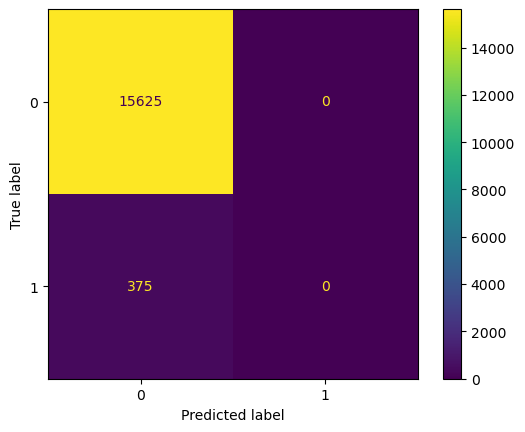

In [56]:
CM_Display =(ConfusionMatrixDisplay(confusion_matrix=Optimised_Confusion_Matrix))
CM_Display.plot()

The confusion matrix shows that this is performing in the same way as the dumb classifier. This is because of the massive class imbalance of the target variable. 

Before I try any further models I am going to try and use some different methods to make up for this class imbalance.

In [58]:
# def ScaniaScoring(y_true: list, y_pred: list):
#     tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#     cost = (tn * 10) + (fp * 500)
#     ScaniaScoring_score = make_scorer(ScaniaScoring, greater_is_better= False)
#     return cost, ScaniaScoring_score
tn, fp, fn, tp = Optimised_Confusion_Matrix.ravel()
   
print(tn, fp, fn, tp) 

15625 0 375 0


## Best parameters using GridSearchCV:

{'learning_rate': 0.01, 'max_depth': 29, 'n_estimators': 20, 'num_leaves': 69}

Returned Scania score: 156250





In [61]:
#### Creating function For LightGBM and Gridsearch

def LightModel(X_train, y_train, X_test, y_test):
    param_grid_2 = {
        'num_leaves': [69,70, 71],
        'max_depth': [29, 30, 31],
        'learning_rate': [0.01],
        'n_estimators': [20, 21, 22]
    }

    GridSearch2 = GridSearchCV(estimator= LGBMClassifier(),
                          param_grid=param_grid_2,
                          scoring= ScaniaScoring_score,
                          n_jobs= -1,
                          cv=5
                          )

    GridSearch2.fit(X_train, y_train)
    IterModel2 = GridSearch2.best_estimator_
    IterModel2.fit(X_train, y_train)
    y_pred2 = IterModel2.predict(X_test)
    IterScaniaScore2 = ScaniaScoring(y_true=y_test, y_pred=y_pred2)


    Optimised_Confusion_Matrix = confusion_matrix(y_true=y_test, y_pred=y_pred2)
    
    return(IterScaniaScore2, GridSearch2.best_params_, Optimised_Confusion_Matrix)

##### Removing Nan Values 

This method hugely reduces the number of samples. This needs to be looked at in detail later. 

Positive is that it reduces the class imbalance.

In [ ]:
TrainDataNaRemoved = TrainData.dropna()


In [65]:
TrainDataNaRemoved.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,0.0,31300.0,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,0.0,97000.0,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,0.0,124656.0,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,1.0,281324.0,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,1.0,43482.0,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0


In [66]:
X_train_na = TrainDataNaRemoved.drop('class', axis=1)
y_train_na = TrainDataNaRemoved['class']

In [67]:
Score, Params, CM = LightModel(X_train_na, y_train_na, X_test, y_test)

[LightGBM] [Info] Number of positive: 76, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22999
[LightGBM] [Info] Number of data points in the train set: 591, number of used features: 151
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128596 -> initscore=-1.913434
[LightGBM] [Info] Start training from score -1.913434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [71]:
print(Score, CM, Params)

156250 [[15625     0]
 [  375     0]] {'learning_rate': 0.01, 'max_depth': 29, 'n_estimators': 20, 'num_leaves': 69}


SMOTE Dataset

In [70]:
X_train_smote = pd.read_csv('data/X_train_smote.csv')
y_train_smote = pd.read_csv('data/y_train_smote.csv')

In [74]:
y_train_smote = y_train_smote['0']

In [78]:
Score, Params, CM = LightModel(X_train_smote, y_train_smote, X_test, y_test)
print(Score, CM, Params)

ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tbrenchley\AppData\Local\anaconda3\envs\ApprenticeshipNotesEnv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tbrenchley\AppData\Local\anaconda3\envs\ApprenticeshipNotesEnv\Lib\site-packages\lightgbm\sklearn.py", line 1560, in fit
    super().fit(
  File "c:\Users\tbrenchley\AppData\Local\anaconda3\envs\ApprenticeshipNotesEnv\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\tbrenchley\AppData\Local\anaconda3\envs\ApprenticeshipNotesEnv\Lib\site-packages\lightgbm\engine.py", line 297, in train
    booster = Booster(params=params, train_set=train_set)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tbrenchley\AppData\Local\anaconda3\envs\ApprenticeshipNotesEnv\Lib\site-packages\lightgbm\basic.py", line 3656, in __init__
    train_set.construct()
  File "c:\Users\tbrenchley\AppData\Local\anaconda3\envs\ApprenticeshipNotesEnv\Lib\site-packages\lightgbm\basic.py", line 2590, in construct
    self._lazy_init(
  File "c:\Users\tbrenchley\AppData\Local\anaconda3\envs\ApprenticeshipNotesEnv\Lib\site-packages\lightgbm\basic.py", line 2227, in _lazy_init
    return self.set_feature_name(feature_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tbrenchley\AppData\Local\anaconda3\envs\ApprenticeshipNotesEnv\Lib\site-packages\lightgbm\basic.py", line 3046, in set_feature_name
    _safe_call(
  File "c:\Users\tbrenchley\AppData\Local\anaconda3\envs\ApprenticeshipNotesEnv\Lib\site-packages\lightgbm\basic.py", line 313, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode("utf-8"))
lightgbm.basic.LightGBMError: Do not support special JSON characters in feature name.


In [77]:
X_train_smote.astype('float')

,Unnamed: 0,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,3.130000e+04,0.000000,784.000000,740.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,...,7.988720e+05,1.127240e+05,5.173600e+04,7.054000e+03,6.628000e+03,2.760000e+04,2.000000,2.000000,0.0,0.0
1,1.0,9.700000e+04,0.000000,378.000000,160.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,...,1.078982e+06,3.133340e+05,5.113300e+05,5.523280e+05,8.715280e+05,8.711040e+05,1980.000000,42.000000,0.0,0.0
2,2.0,1.246560e+05,2.000000,278.000000,170.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,...,1.205696e+06,8.661480e+05,6.976100e+05,7.004000e+05,1.900386e+06,4.375320e+05,3680.000000,0.000000,0.0,0.0
3,3.0,2.813240e+05,2.000000,3762.000000,2346.000000,0.0,0.0,4808.000000,215720.000000,9.675720e+05,...,6.246060e+05,2.699760e+05,6.388380e+05,1.358354e+06,8.199180e+05,2.628040e+05,2824.000000,0.000000,0.0,0.0
4,4.0,4.348200e+04,0.000000,1534.000000,1388.000000,0.0,0.0,0.000000,0.000000,4.002400e+04,...,4.971960e+05,1.211660e+05,2.022720e+05,2.326360e+05,6.456900e+05,5.000000e+01,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1025.0,5.647026e+05,0.000000,2036.695065,1492.264266,0.0,0.0,0.000000,19927.432245,5.277005e+05,...,3.588189e+06,1.469985e+06,3.075972e+06,7.207726e+06,4.451073e+06,1.620880e+06,52125.897122,11.093393,0.0,0.0
1026,1026.0,4.611738e+05,1.140566,1051.497888,799.538477,0.0,0.0,0.000000,10647.524640,2.010594e+05,...,6.632100e+05,2.143238e+05,4.303036e+05,5.495258e+05,1.054970e+06,3.069910e+05,2329.220747,0.000000,0.0,0.0
1027,1027.0,2.387833e+05,3.492406,4226.909258,3558.427109,0.0,0.0,0.000000,111.930417,3.660871e+05,...,2.035193e+06,5.613452e+05,1.437653e+06,3.898348e+06,1.951578e+06,7.212685e+04,12118.743102,0.000000,0.0,0.0
1028,1028.0,3.747251e+05,0.000000,3827.818319,3398.333376,0.0,0.0,0.000000,223.418944,2.618561e+05,...,1.396710e+06,4.935247e+05,1.143677e+06,6.052573e+05,5.150747e+05,2.405350e+06,58288.681360,27.096710,0.0,0.0
